
Classification Report:
              precision    recall  f1-score   support

       False       0.77      0.83      0.80     17147
        True       0.81      0.75      0.78     16976

    accuracy                           0.79     34123
   macro avg       0.79      0.79      0.79     34123
weighted avg       0.79      0.79      0.79     34123


Confusion Matrix:
[[14239  2908]
 [ 4173 12803]]


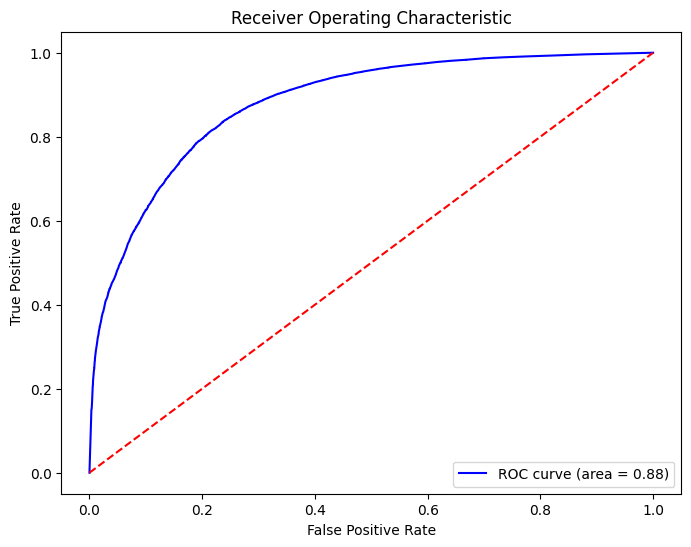

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/ajayramaraju/Desktop/630 Python/Final project/healthcare_noshows 6.16.50 PM.csv'
data = pd.read_csv(file_path)

# Feature Engineering
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['Date.diff'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
data['DayOfWeek'] = data['AppointmentDay'].dt.dayofweek

# Drop irrelevant columns
data = data.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'Neighbourhood']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
X = data.drop(columns=['Showed_up'])
y = data['Showed_up']

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()